In [1]:
from IPython.core.display import HTML
HTML("<style>.container { width:90% !important; }</style>")

In [16]:
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import interpolate

PLOT = True
savePath = "/Users/mfisherlevine/Desktop/CBP_talk_plots/2D/"

# def ContourPlot(data, n_contours=100, saveas=None):
#     if not PLOT: return
#     fig = plt.figure(figsize=(1.05*10,10))
#     h = plt.contourf(x,y,data,n_contours, cmap=plt.cm.gist_heat)
#     ax = fig.add_subplot(111)
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.05)
#     plt.colorbar(h, cax=cax)
#     if saveas: fig.savefig(saveas)
#     plt.show()

def ContourPlot(data, n_contours=100, saveas=None, xy_clip=1.0):
    if not PLOT: return

    # get limits
    xlim=(-1.*xy_clip,xy_clip)
    ylim=(-1.*xy_clip,xy_clip)
    npts = len(x)
    index_min = int(((1.-xy_clip)/2.) * npts)
    index_max = npts - index_min
    zmin = np.min(data[index_min:index_max, index_min:index_max])
    zmax = np.max(data[index_min:index_max, index_min:index_max])
    
    with plt.rc_context({'axes.formatter.useoffset': False}):
        fig = plt.figure(figsize=(1.05*10,10))

        ax = fig.add_subplot(111)
        h = plt.contourf(x[index_min:index_max], y[index_min:index_max],
                         data[index_min:index_max, index_min:index_max],
                         n_contours, cmap=plt.cm.gist_heat, vmin=zmin, vmax=zmax)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)

        cbar = fig.colorbar(h, cax=cax)
        tick_labels = cbar.ax.get_yticklabels()
        ticks       = cbar.ax.get_yticks()

    if saveas: fig.savefig(saveas)
    plt.show()

def SurfacePlot(data, downsample_factor=50, linewidth=0.5, zlim=None, saveas=None):
    if not PLOT: return
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(xx, yy, data, rstride=downsample_factor, cstride=downsample_factor, linewidth=linewidth, cmap=plt.cm.gist_heat)
    if zlim is not None: ax.set_zlim(zlim[0],zlim[1])
    if saveas: fig.savefig(saveas)
    plt.show()
    
def ContourAndSurfacePlot(data, n_contours=100, downsample_factor=50, linewidth=0.5, zlim=None, saveas=None, vertical=False):
    if not PLOT: return
    if vertical:
        fig = plt.figure(figsize=(10,22))
        ax = fig.add_subplot(211)
    else:
        fig = plt.figure(figsize=(22,10))
        ax = fig.add_subplot(121)
    h = plt.contourf(x,y,data,n_contours, cmap=plt.cm.gist_heat)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(h, cax=cax)

    if vertical:
        ax = fig.add_subplot(212, projection='3d')
    else:
        ax = fig.add_subplot(122, projection='3d')
    surf = ax.plot_surface(xx, yy, data, rstride=downsample_factor, cstride=downsample_factor, linewidth=linewidth, cmap=plt.cm.gist_heat)
    if zlim is not None: ax.set_zlim(zlim[0],zlim[1])
    if saveas: fig.savefig(saveas)
    plt.show()
    
def random_sign():
    return (-1.)**np.random.randint(0,2) #upper bound is exclusive

def random_float(minval, maxval):
    return minval + (maxval-minval)*np.random.random()

def Make2DIndexFrom1DCoords(coords):
    xs = np.asarray([coords for _ in coords]) # tile the coords
    ys = np.asarray([[coords[j] for i in range(len(coords))] for j in range(len(coords))]) # repeat each value in coords len(coords) times
    return (xs, ys) # tuple of ndarrays, as returned by np.where()

# def ChipFromXY(x, y):
#     if x>=(N_CCDS_PER_SIDE*N_PIX_PER_CCD) or y>=(N_CCDS_PER_SIDE*N_PIX_PER_CCD):
#         raise ValueError('Pixel coordinate lies outside the focal plane')
#     return int(x//N_PIX_PER_CCD), int(y//N_PIX_PER_CCD)

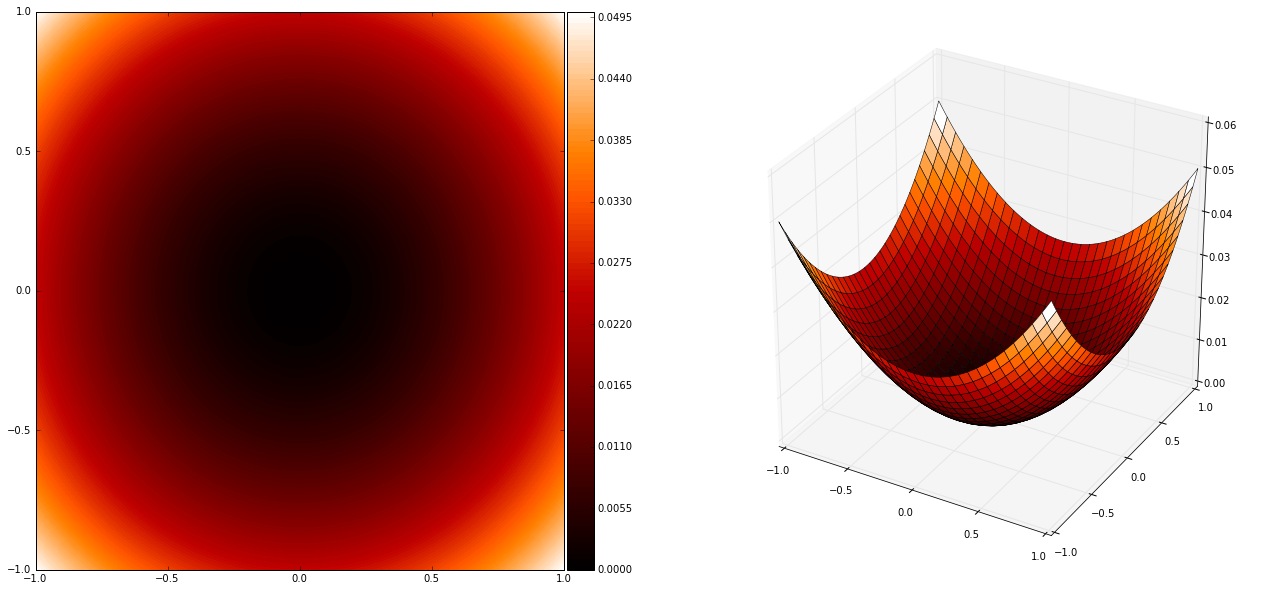

In [5]:
N_PIX_PER_CCD = 500 # (per side, of course)
N_CCDS_PER_SIDE = 3 # for assembling an n x n grid of CCDs

np.random.seed(1)

x = np.linspace(-1, 1, N_PIX_PER_CCD*N_CCDS_PER_SIDE)
y = np.linspace(-1, 1, N_PIX_PER_CCD*N_CCDS_PER_SIDE)

x_chip = np.linspace(-1, 1, N_PIX_PER_CCD)
y_chip = np.linspace(-1, 1, N_PIX_PER_CCD)

# pixel coordinates
# using complex makes bounds inclusive, and avoids having to do 1./n as it implies the number of points
# xx, yy = np.mgrid[-1:1:complex(N_PIX_PER_CCD*N_CCDS_PER_SIDE), -1:1:complex(N_PIX_PER_CCD*N_CCDS_PER_SIDE)]#.reshape(2,-1).T
# pixels = np.vstack((xx.flatten(), yy.flatten())).T
xx, yy = np.meshgrid(x, y)
xx_chip, yy_chip = np.meshgrid(x_chip, y_chip)


# additive part of flat field screen illumination
illum = 0.025*(xx**2 + yy**2)
# true per-pixel sensitivity variation (assuming all pixels are the same size)
nPerCCD = N_PIX_PER_CCD    # we have 4 chips in the following S_qe prescription

ContourAndSurfacePlot(illum, saveas=savePath+'illumination.png', vertical=False)
# ContourPlot(illum, saveas=savePath+'illumination_cont.png')
# SurfacePlot(illum, saveas=savePath+'illumination_surf.png')

Quantum efficiency map:


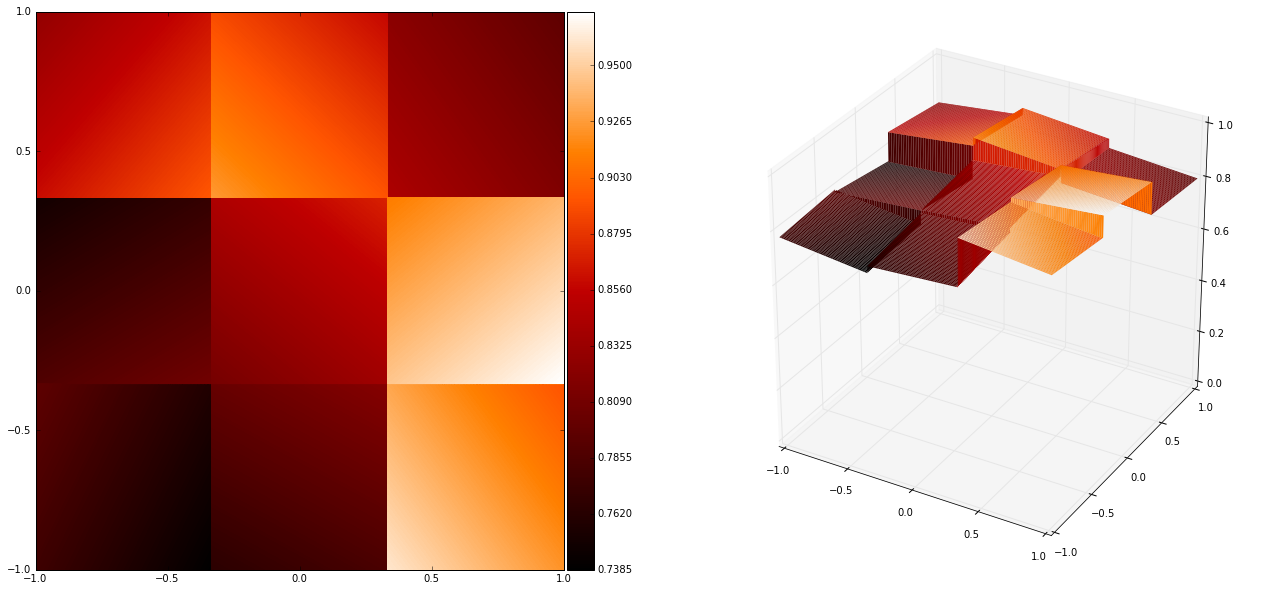

Quantum efficiency histogram:
Min QE = 73.9%
Max QE = 97.2%


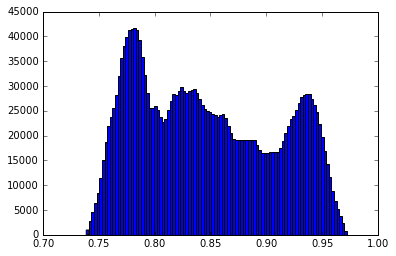

In [6]:
# generate some random gradients and nominal QE values
# QE gradients are in the range 0.01 - 0.02
# Slopes are assigned at random in both x and y directions
# nominal QE is randomly assigned between 80 and 100%

# x_gradients = [random_sign()*np.random.randint(500,1000)/50000. for _ in range(N_CCDS_PER_SIDE**2)]
# y_gradients = [random_sign()*np.random.randint(500,1000)/50000. for _ in range(N_CCDS_PER_SIDE**2)]
# nom_qes =     [np.random.randint(8000,10000)/10000. for _ in range(N_CCDS_PER_SIDE**2)]

x_gradients = [random_sign()*random_float(.01,0.02) for _ in range(N_CCDS_PER_SIDE**2)]
y_gradients = [random_sign()*random_float(.01,0.02) for _ in range(N_CCDS_PER_SIDE**2)]
nom_qes =     [random_float(.8,1.) for _ in range(N_CCDS_PER_SIDE**2)]

S_qe = np.zeros_like(illum)
for i in range(N_CCDS_PER_SIDE):
    for j in range(N_CCDS_PER_SIDE):
        # linear index for the gradients and nominal QEs
        index = j + (N_CCDS_PER_SIDE*i)
        
        # make the QE for the chip
        chip = 0.95*((x_gradients[index]*xx_chip + y_gradients[index]*yy_chip) + nom_qes[index])
       
        # Tile the chips onto the raft
        S_qe[i*N_PIX_PER_CCD:(i+1)*N_PIX_PER_CCD, j*N_PIX_PER_CCD:(j+1)*N_PIX_PER_CCD] = chip

# Check the QE plot 
print 'Quantum efficiency map:'
ContourAndSurfacePlot(S_qe, n_contours=1000, downsample_factor=10, linewidth=0.01, zlim=(0,1), saveas=savePath+'QE.png')
# ContourPlot(S_qe, n_contours=1000, saveas=savePath+'QE_cont.png')
# SurfacePlot(S_qe, downsample_factor=10, linewidth=0.01, zlim=(0,1), saveas=savePath+'QE_surf.png')


# SurfacePlot(S_qe, downsample_factor=10, linewidth=0.01, zlim=(0,1), saveas=savePath+'QE.png')
print 'Quantum efficiency histogram:'
plt.hist(S_qe.flatten(), bins=100)
print 'Min QE = %.1f%%'%(100*np.min(S_qe))
print 'Max QE = %.1f%%'%(100*np.max(S_qe))

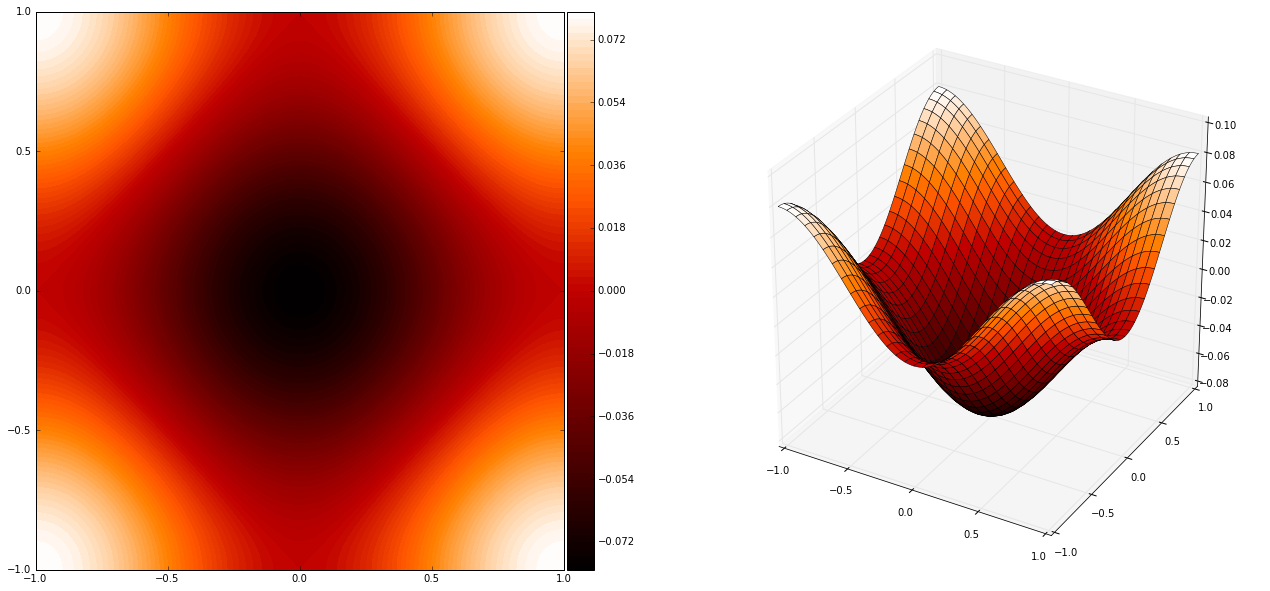

In [7]:
# additive term due to ghosting
A = -(0.04*np.cos(xx*np.pi)+0.04*np.cos(yy*np.pi))
ContourAndSurfacePlot(A, saveas=savePath+'ghosting_pattern.png')
# ContourPlot(A, saveas=savePath+'ghosting_pattern_cont.png')
# SurfacePlot(A, saveas=savePath+'ghosting_pattern_surf.png')

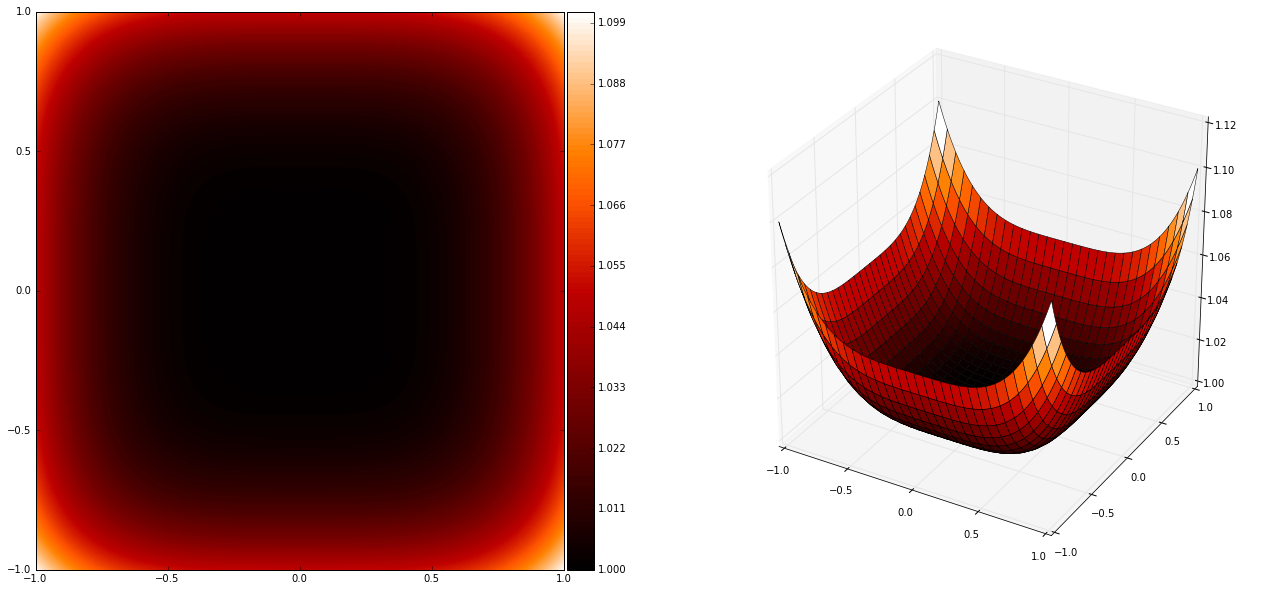

In [8]:
# Optical distortion in the focal plane. This is not vignetting as that is degenerate with QE.
# This models the effective angle subtended by pixels as a function of their position on the focal plane.
S_optical = 1 + (0.05*xx**4) + (0.05*yy**4)
ContourAndSurfacePlot(S_optical, saveas=savePath+'optical_distortion.png')
# ContourPlot(S_optical, saveas=savePath+'optical_distortion_cont.png')
# SurfacePlot(S_optical, saveas=savePath+'optical_distortion_surf.png')

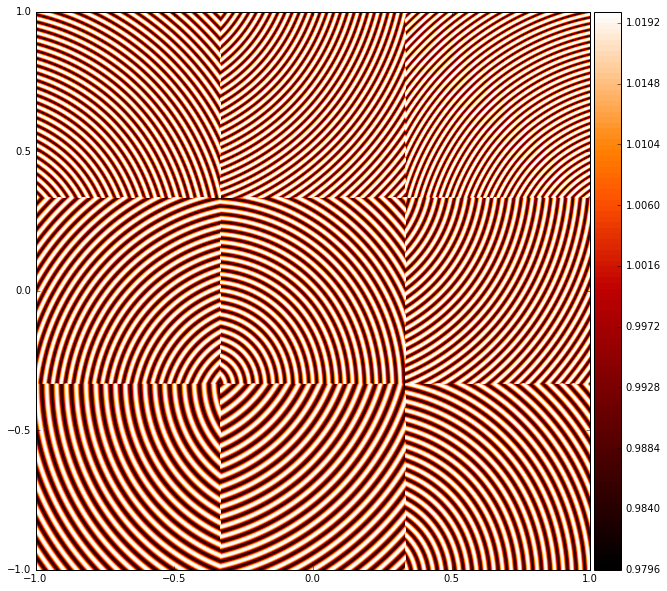

In [9]:
# pixel size variations (e.g. tree rings etc) within a chip
# and made non-commensurate with all other pitches

# frequencies = [31, 37, 41, 43, 47, 53, 59, 61, 67] # list of prime numbers --> non-commensurate frequencies
frequencies = [59, 61, 67, 71, 73, 79, 83, 89, 97] # list of prime numbers --> non-commensurate frequencies

S_ccd = np.zeros_like(illum)
for i in range(N_CCDS_PER_SIDE):
    for j in range(N_CCDS_PER_SIDE):
        # linear index for picking the tree-ring periods
        index = j + (N_CCDS_PER_SIDE*i)
        
        # make tree-ring origin for each chip
        x0 = random_sign() * (1 + random_float(0,1)) # always off chip, but by a small and random amount
        y0 = random_sign() * (1 + random_float(0,1)) # different random amount also effectively adds a random phase

        # put down tree rings with prime number period and origin from above
        chip = 1 + 0.02*(np.cos(frequencies[index]*np.sqrt((xx_chip-x0)**2+(yy_chip-y0)**2)))

        # Tile the chips onto the raft
        S_ccd[i*N_PIX_PER_CCD:(i+1)*N_PIX_PER_CCD, j*N_PIX_PER_CCD:(j+1)*N_PIX_PER_CCD] = chip

ContourPlot(S_ccd, n_contours=100, saveas=savePath+'pixel_size_variation.png')

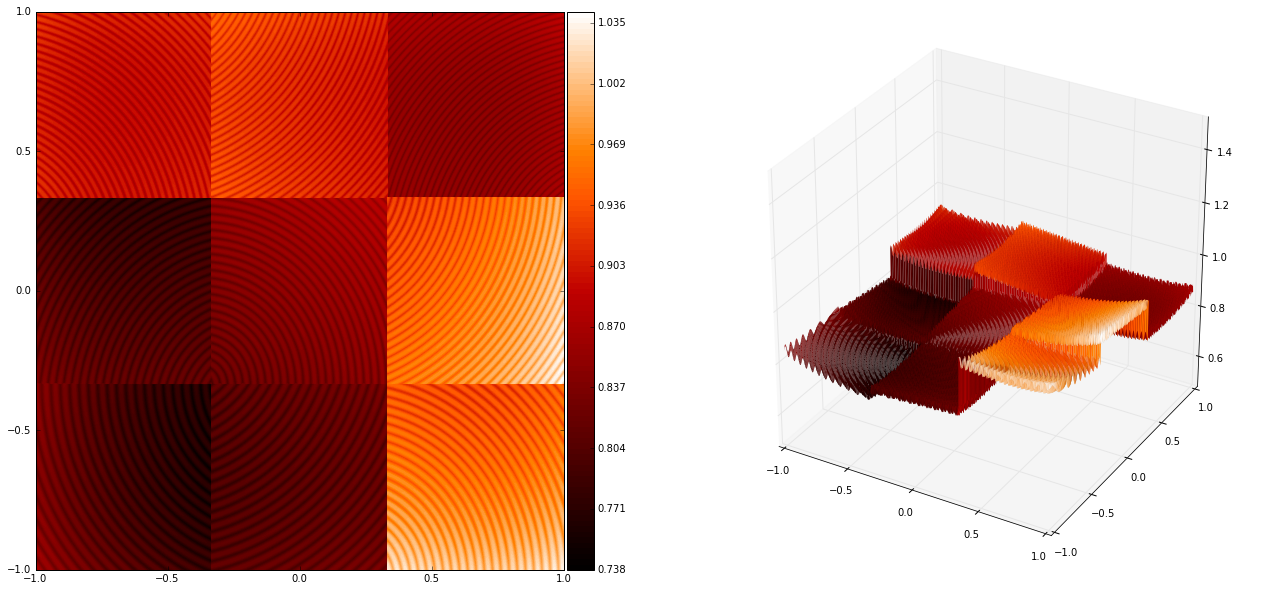

In [10]:
# sensitivity allowing for pixel size variation
calS = S_qe*S_optical*S_ccd
ContourAndSurfacePlot(calS, zlim=(0.5,1.5), downsample_factor=10, linewidth=0.01, saveas=savePath+'calS.png')
# ContourPlot(calS, saveas=savePath+'calS_cont.png')
# SurfacePlot(calS, zlim=(0.5,1.5), downsample_factor=10, linewidth=0.01, saveas=savePath+'calS_surf.png')

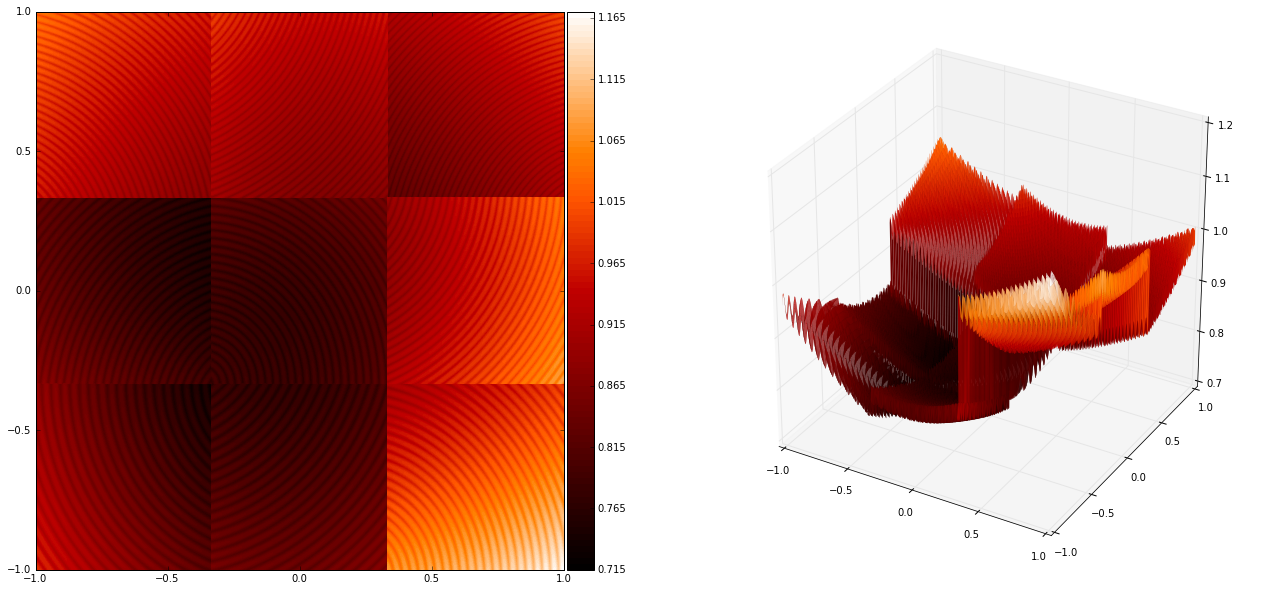

In [11]:
# measured flat field
Fb = (1 + illum + A)*calS
ContourAndSurfacePlot(Fb, downsample_factor=10, linewidth=0.01, saveas=savePath+'flat_field.png')
# ContourPlot(Fb, saveas=savePath+'flat_field_cont.png')
# SurfacePlot(Fb, downsample_factor=10, linewidth=0.01, saveas=savePath+'flat_field_surf.png')

In [12]:
nSampleperCCD = 5 # linear spec, is mirrored in y
sample_points_1D_chip = np.linspace(0,N_PIX_PER_CCD,nSampleperCCD+1, endpoint=False)
sample_points_1D_chip = np.round(sample_points_1D_chip[1:],0).astype(np.int)
sample_points_1D = []

sample_points_2D = Make2DIndexFrom1DCoords(sample_points_1D_chip)

samples_chip = np.zeros((N_PIX_PER_CCD,N_PIX_PER_CCD), dtype=np.bool)
samples_chip[sample_points_2D] = True

samples = np.zeros((N_PIX_PER_CCD*N_CCDS_PER_SIDE,N_PIX_PER_CCD*N_CCDS_PER_SIDE), dtype=np.bool)
# samples_display_only = np.copy(samples)
for i in range(N_CCDS_PER_SIDE):
    sample_points_1D.extend([(_ + i*N_PIX_PER_CCD) for _ in sample_points_1D_chip])
    for j in range(N_CCDS_PER_SIDE):
        # Tile the chips onto the raft
        samples[i*N_PIX_PER_CCD:(i+1)*N_PIX_PER_CCD, j*N_PIX_PER_CCD:(j+1)*N_PIX_PER_CCD] = samples_chip

assert np.sum(samples) == nSampleperCCD**2 * (N_CCDS_PER_SIDE**2)
del samples_chip # prevent misuse

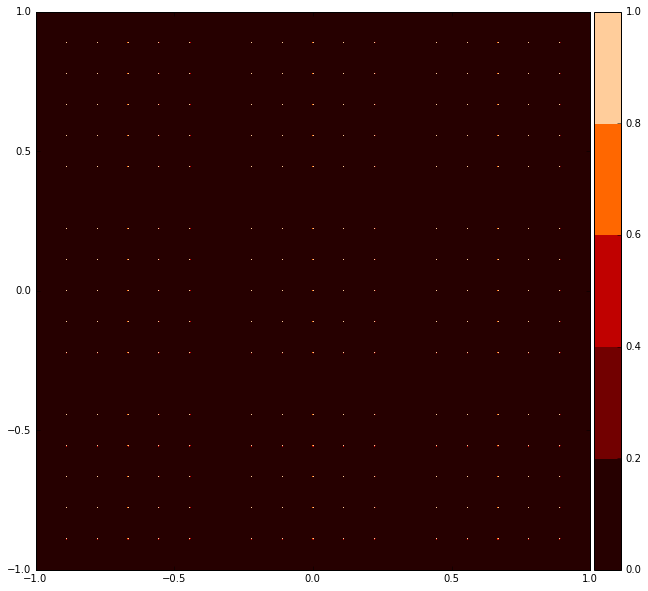

In [13]:
ContourPlot(samples, n_contours=5)

In [ ]:
fig = plt.figure(figsize=(15,15))
plt.imshow(samples[0:N_PIX_PER_CCD,0:N_PIX_PER_CCD], interpolation='nearest', cmap='gray')
plt.show()
fig = plt.figure(figsize=(20,20))
plt.imshow(samples, interpolation='gaussian', cmap='gist_heat')

CBP interpolation:


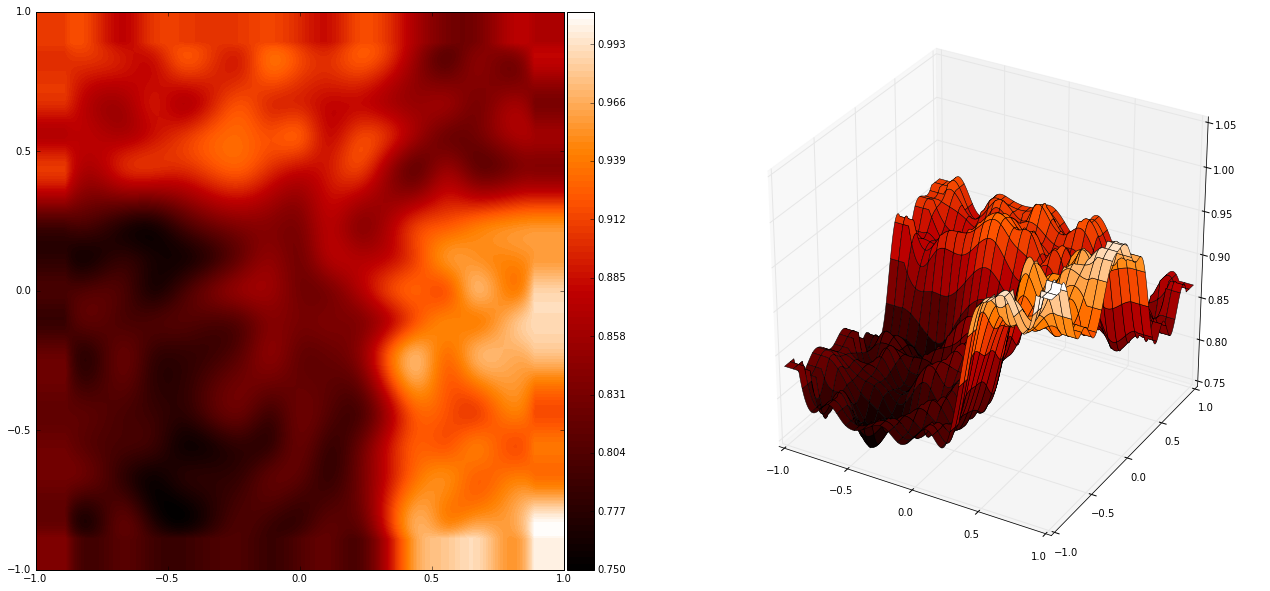

Raw estimated illumination:


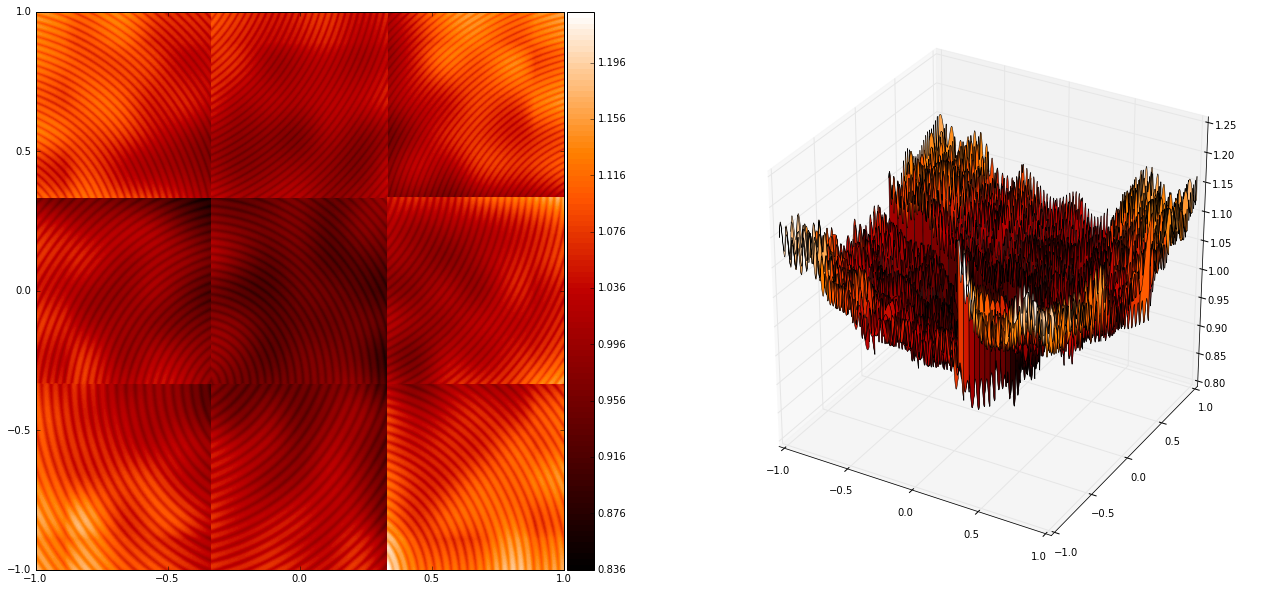

In [19]:
# interpCalS = interpolate.InterpolatedUnivariateSpline(ib[samples], calS[samples], k=3)  # spline fit to CBP data
# spline fit to CBP data
interpCalS = interpolate.RectBivariateSpline(x[sample_points_1D], y[sample_points_1D], calS[samples].reshape(len(sample_points_1D),len(sample_points_1D)), s=0)  

# # Estimate the illumination from the interpolated CBP data
rawEstIllum = Fb/interpCalS(x, y)   # raw estimated illumination

# PLOT = True
print 'CBP interpolation:'
ContourAndSurfacePlot(interpCalS(x, y),saveas=savePath+'CBP_interp_cont.png')
# ContourPlot(interpCalS(x, y),saveas=savePath+'CBP_interp_cont.png')
# SurfacePlot(interpCalS(x, y),saveas=savePath+'CBP_interp_surf.png')

print 'Raw estimated illumination:'
ContourAndSurfacePlot(rawEstIllum, saveas=savePath+'CBP_interp_cont.png')
# ContourPlot(rawEstIllum, saveas=savePath+'raw_est_illum_cont.png')
# SurfacePlot(rawEstIllum, saveas=savePath+'raw_est_illum_surf.png')

Interpolated illumination:


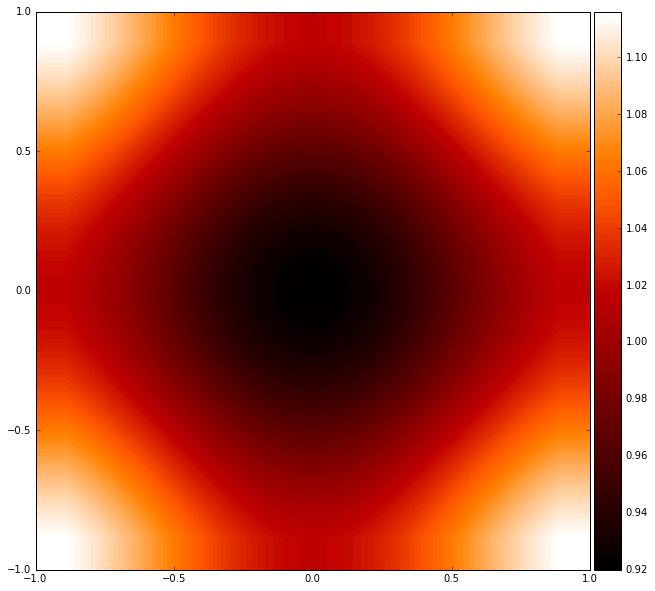

Estimated calS:


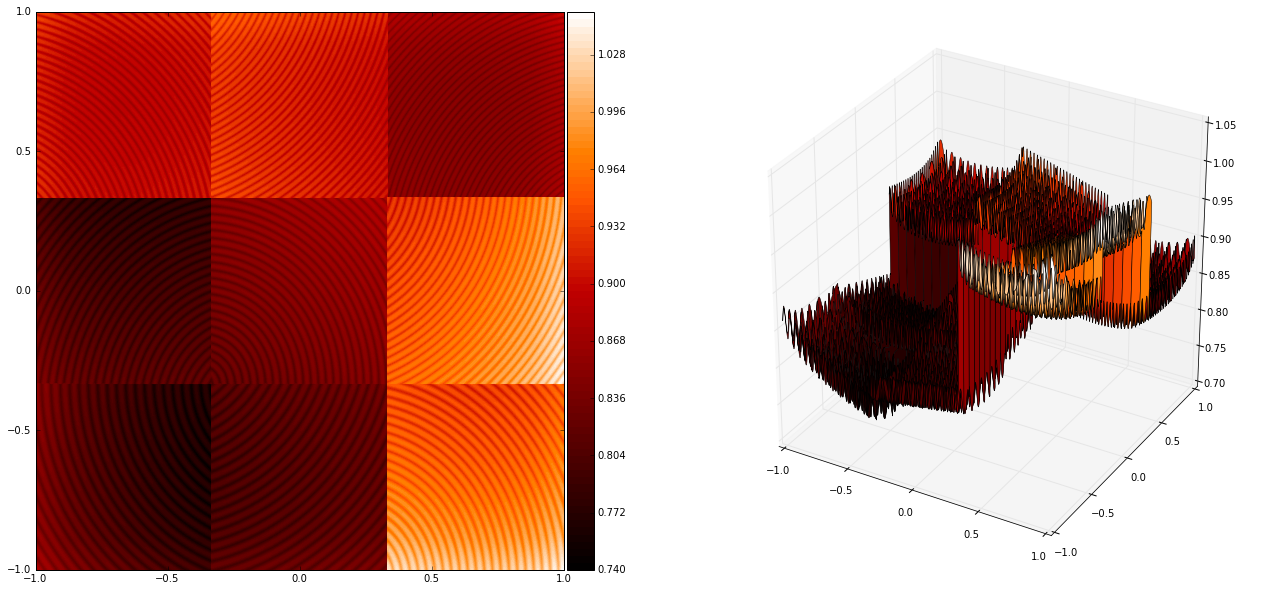

In [20]:
# # And fit it with a smoothing spline
# interpIllum = interpolate.RectBivariateSpline(ib[samples], rawEstIllum[samples], s=1e-8)
interpIllum = interpolate.RectBivariateSpline(x[sample_points_1D],
                                              y[sample_points_1D],
                                              rawEstIllum[samples].reshape(len(sample_points_1D),len(sample_points_1D)),
                                              s=1e-8)



# # and use that to estimate the true calS
estCalS = Fb/(interpIllum(x, y))

print 'Interpolated illumination:'
ContourPlot(interpIllum(x, y))
print 'Estimated calS:'
ContourAndSurfacePlot(estCalS, saveas=savePath+'est_CalS_cont.png')
# ContourPlot(estCalS, saveas=savePath+'est_CalS_cont.png')
# SurfacePlot(estCalS, saveas=savePath+'est_CalS_surf.png')

In [25]:
def SurfacePlot(data, downsample_factor=50, linewidth=0.5, zlim=None, saveas=None, xy_clip=1.0):
    if not PLOT: return
    xlim=(-1.*xy_clip,xy_clip)
    ylim=(-1.*xy_clip,xy_clip)
    npts = len(x)
    index_min = int(((1.-xy_clip)/2.) * npts)
    index_max = npts - index_min

    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    print np.max(data[index_min:index_max,index_min:index_max])
    surf = ax.plot_surface(xx[index_min:index_max,index_min:index_max], yy[index_min:index_max,index_min:index_max], data[index_min:index_max,index_min:index_max], rstride=downsample_factor, cstride=downsample_factor, linewidth=linewidth, cmap=plt.cm.gist_heat)


    if zlim is not None: ax.set_zlim(zlim[0],zlim[1])
    if saveas: fig.savefig(saveas)
    plt.show()
    

In [22]:
import new_functions as fn
fn = reload(fn)
fn.SetAxisScaleAbsolute()

Flat-field illumination correction residuals
1.00002146325


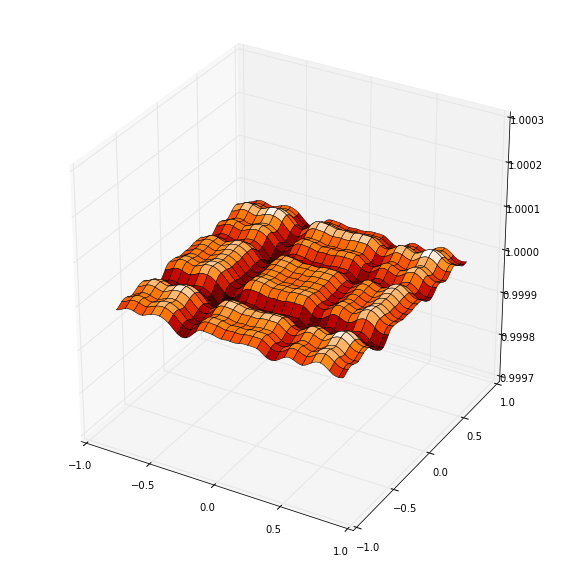

Good in 1 part in: 18068(min), -73(max)


In [30]:
print 'Flat-field illumination correction residuals'

residuals = estCalS/calS
# ContourPlot(residuals, n_contours=100, xy_clip=1,    saveas=savePath+'CBP-errors_full.png')
# ContourPlot(residuals, n_contours=100, xy_clip=0.85, saveas=savePath+'CBP-errors_clip.png')

# ContourPlot(residuals, saveas=savePath+'residuals_cont.png')

dz = 0.0003
SurfacePlot(residuals, saveas=savePath+'residuals_surf.png', downsample_factor=50, xy_clip=.85, zlim=(1-dz,1+dz))

maxval = np.max(residuals)
minval = np.min(residuals)
print 'Good in 1 part in: %i(min), %i(max)'%(1/(1-minval), 1/(1-maxval))


In [32]:
PLOT = False

max_errors = []
min_errors = []

for nSampleperCCD in range(2,50):            # number of CBP spots per chip
    sample_points_1D_chip = np.linspace(0,N_PIX_PER_CCD,nSampleperCCD+1, endpoint=False)
    sample_points_1D_chip = np.round(sample_points_1D_chip[1:],0).astype(np.int)
    sample_points_1D = []

    sample_points_2D = Make2DIndexFrom1DCoords(sample_points_1D_chip)

    samples_chip = np.zeros((N_PIX_PER_CCD,N_PIX_PER_CCD), dtype=np.bool)
    samples_chip[sample_points_2D] = True

    samples = np.zeros((N_PIX_PER_CCD*N_CCDS_PER_SIDE,N_PIX_PER_CCD*N_CCDS_PER_SIDE), dtype=np.bool)
    for i in range(N_CCDS_PER_SIDE):
        sample_points_1D.extend([(_ + i*N_PIX_PER_CCD) for _ in sample_points_1D_chip])
        for j in range(N_CCDS_PER_SIDE):
            # Tile the chips onto the raft
            samples[i*N_PIX_PER_CCD:(i+1)*N_PIX_PER_CCD, j*N_PIX_PER_CCD:(j+1)*N_PIX_PER_CCD] = samples_chip

    assert np.sum(samples) == nSampleperCCD**2 * (N_CCDS_PER_SIDE**2)
    del samples_chip # prevent misuse
    
    
    interpCalS = interpolate.RectBivariateSpline(x[sample_points_1D], y[sample_points_1D], calS[samples].reshape(len(sample_points_1D),len(sample_points_1D)), s=0)  
    rawEstIllum = Fb/interpCalS(x, y)   # raw estimated illumination

    interpIllum = interpolate.RectBivariateSpline(x[sample_points_1D],
                                                  y[sample_points_1D],
                                                  rawEstIllum[samples].reshape(len(sample_points_1D),len(sample_points_1D)),
                                                  s=1e-8)

    estCalS = Fb/(interpIllum(x, y))
    residuals = estCalS/calS
    
    ContourPlot(residuals, n_contours=100, xy_clip=1,    saveas=savePath+'CBP-errors_full_%s.png'%nSampleperCCD)
    ContourPlot(residuals, n_contours=100, xy_clip=0.85, saveas=savePath+'CBP-errors_clip_%s.png'%nSampleperCCD)
    
    maxval = np.max(residuals)
    minval = np.min(residuals)
    min_errors.append(minval)
    max_errors.append(maxval)

    print 'For %s samples: correction is good in 1 part in: %i(min), %i(max)'%(nSampleperCCD, 1/(1-minval), -1./(1-maxval))

    

For 2 samples: correction is good in 1 part in: 1168(min), 28(max)
For 3 samples: correction is good in 1 part in: 3875(min), 42(max)
For 4 samples: correction is good in 1 part in: 9304(min), 57(max)
For 5 samples: correction is good in 1 part in: 18068(min), 73(max)
For 6 samples: correction is good in 1 part in: 31907(min), 89(max)
For 7 samples: correction is good in 1 part in: 40537(min), 105(max)
For 8 samples: correction is good in 1 part in: 43829(min), 119(max)
For 9 samples: correction is good in 1 part in: 65378(min), 136(max)
For 10 samples: correction is good in 1 part in: 80343(min), 154(max)
For 11 samples: correction is good in 1 part in: 83193(min), 168(max)
For 12 samples: correction is good in 1 part in: 76243(min), 188(max)
For 13 samples: correction is good in 1 part in: 72759(min), 200(max)
For 14 samples: correction is good in 1 part in: 84994(min), 221(max)
For 15 samples: correction is good in 1 part in: 123299(min), 238(max)
For 16 samples: correction is good 

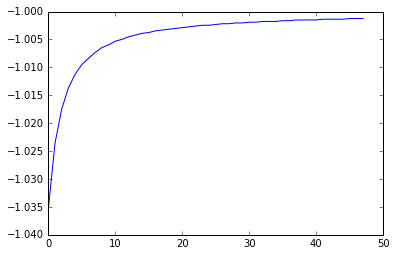

In [33]:
plt.plot([-1.*_ for _ in max_errors])

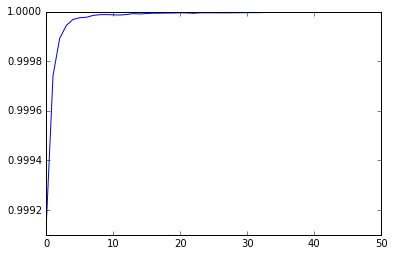

In [34]:
plt.plot([_ for _ in min_errors])